<a href="https://colab.research.google.com/github/Hamerson-jhoel/Teoria-de-aprendizaje-de-maquina/blob/main/TAM_TAREA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 1

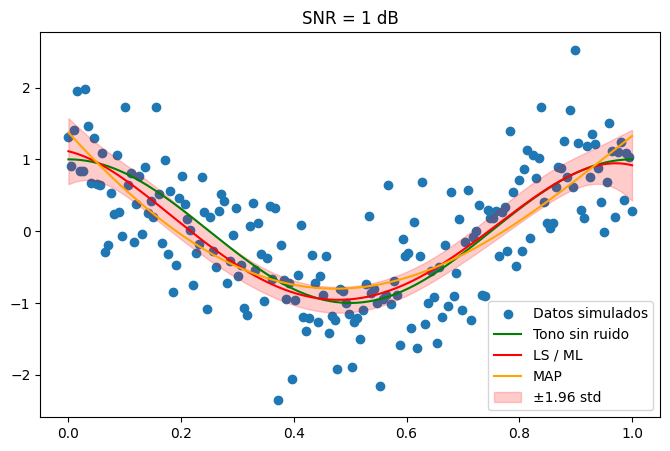

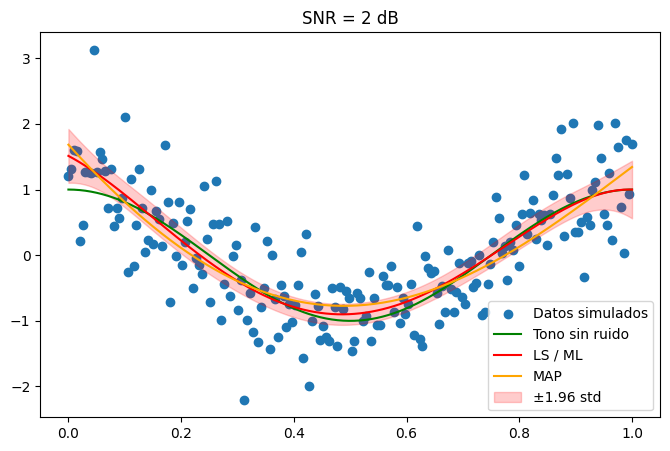

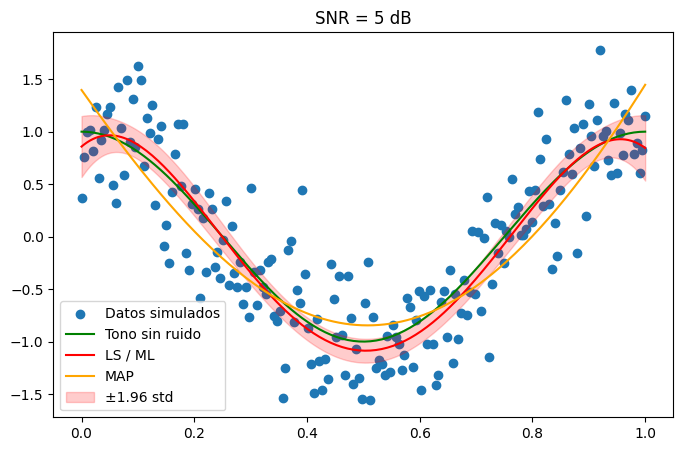

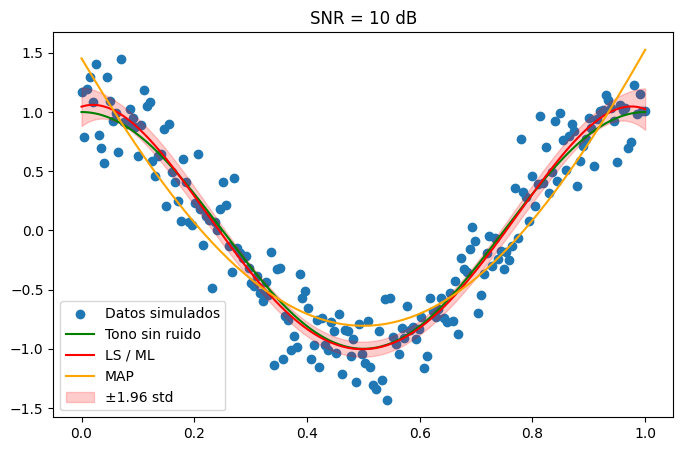

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

# ==============================
# 1. Parámetros
# ==============================
N = 200
f = 1
t = np.linspace(0, 1, N)
snr_db_list = [1, 2, 5, 10]

# Tono limpio
s = np.cos(2*np.pi*f*t)

# Potencia señal
Ps = np.mean(s**2)

# ==============================
# 2. Base polinomial
# ==============================
def phi(x, M):
    return np.vstack([x**m for m in range(M)]).T

M = 5   # orden del polinomio

# ==============================
# 3. Loop para distintos SNR
# ==============================
for snr_db in snr_db_list:

    sigma2 = Ps / (10**(snr_db/10))
    sigma = np.sqrt(sigma2)

    ruido = np.random.normal(0, sigma, N)
    y = s + ruido

    # División 80/20
    t_train, t_test, y_train, y_test = train_test_split(t, y, test_size=0.2, random_state=1)

    Phi_train = phi(t_train, M)
    Phi_test = phi(t_test, M)

    # ==============================
    # 4. Minimos Cuadrados (LS)
    # ==============================
    w_ls = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ y_train

    # ==============================
    # 5. Máxima Verosimilitud (ML)
    # (equivalente a LS en ruido gaussiano)
    # ==============================
    w_ml = w_ls

    # ==============================
    # 6. MAP
    # ==============================
    alpha = 1e-2   # varianza prior
    w_map = np.linalg.inv(Phi_train.T @ Phi_train + alpha*np.eye(M)) @ Phi_train.T @ y_train

    # ==============================
    # 7. Predicción
    # ==============================
    Phi_full = phi(t, M)

    y_ls = Phi_full @ w_ls
    y_map = Phi_full @ w_map

    # Incertidumbre LS
    Sigma_w = sigma2 * np.linalg.inv(Phi_train.T @ Phi_train)
    var_pred = np.sum(Phi_full @ Sigma_w * Phi_full, axis=1)
    std_pred = np.sqrt(var_pred)

    # ==============================
    # 8. Gráfica
    # ==============================
    plt.figure(figsize=(8,5))
    plt.scatter(t, y, label="Datos simulados")
    plt.plot(t, s, 'g', label="Tono sin ruido")
    plt.plot(t, y_ls, 'r', label="LS / ML")
    plt.plot(t, y_map, 'orange', label="MAP")

    plt.fill_between(t,
                     y_ls - 1.96*std_pred,
                     y_ls + 1.96*std_pred,
                     color='red', alpha=0.2,
                     label="±1.96 std")

    plt.title(f"SNR = {snr_db} dB")
    plt.legend()
    plt.show()

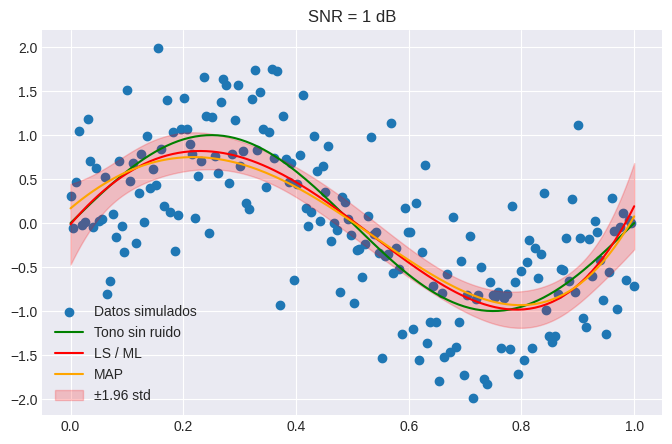

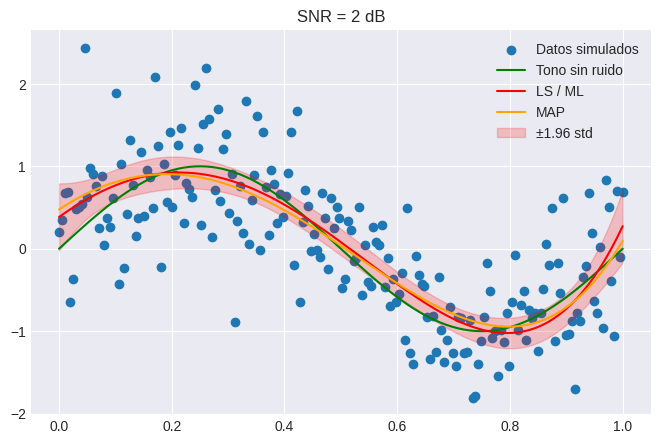

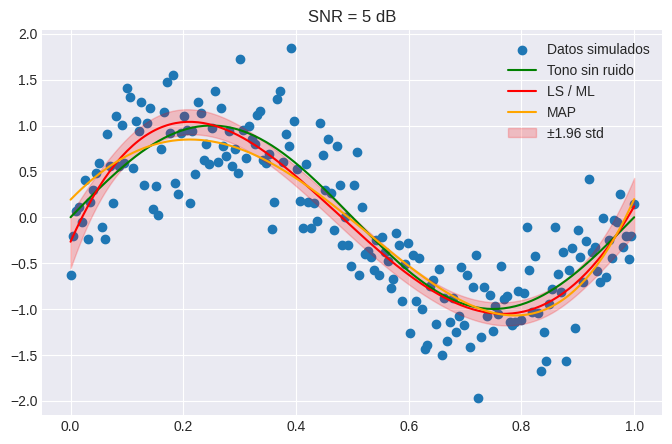

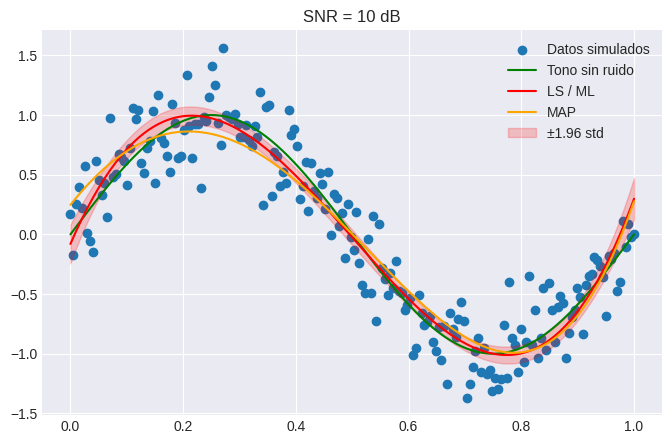

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

# ==============================
# 1. Parámetros
# ==============================
N = 200
f = 1
t = np.linspace(0, 1, N)
snr_db_list = [1, 2, 5, 10]

# Tono limpio
s = np.sin(2*np.pi*f*t)

# Potencia señal
Ps = np.mean(s**2)

# ==============================
# 2. Base polinomial
# ==============================
def phi(x, M):
    return np.vstack([x**m for m in range(M)]).T

M = 5   # orden del polinomio

# ==============================
# 3. Loop para distintos SNR
# ==============================
for snr_db in snr_db_list:

    sigma2 = Ps / (10**(snr_db/10))
    sigma = np.sqrt(sigma2)

    ruido = np.random.normal(0, sigma, N)
    y = s + ruido

    # División 80/20
    t_train, t_test, y_train, y_test = train_test_split(t, y, test_size=0.2, random_state=1)

    Phi_train = phi(t_train, M)
    Phi_test = phi(t_test, M)

    # ==============================
    # 4. Minimos Cuadrados (LS)
    # ==============================
    w_ls = np.linalg.inv(Phi_train.T @ Phi_train) @ Phi_train.T @ y_train

    # ==============================
    # 5. Máxima Verosimilitud (ML)
    # (equivalente a LS en ruido gaussiano)
    # ==============================
    w_ml = w_ls

    # ==============================
    # 6. MAP
    # ==============================
    alpha = 1e-2   # varianza prior
    w_map = np.linalg.inv(Phi_train.T @ Phi_train + alpha*np.eye(M)) @ Phi_train.T @ y_train

    # ==============================
    # 7. Predicción
    # ==============================
    Phi_full = phi(t, M)

    y_ls = Phi_full @ w_ls
    y_map = Phi_full @ w_map

    # Incertidumbre LS
    Sigma_w = sigma2 * np.linalg.inv(Phi_train.T @ Phi_train)
    var_pred = np.sum(Phi_full @ Sigma_w * Phi_full, axis=1)
    std_pred = np.sqrt(var_pred)

    # ==============================
    # 8. Gráfica
    # ==============================
    plt.figure(figsize=(8,5))
    plt.scatter(t, y, label="Datos simulados")
    plt.plot(t, s, 'g', label="Tono sin ruido")
    plt.plot(t, y_ls, 'r', label="LS / ML")
    plt.plot(t, y_map, 'orange', label="MAP")

    plt.fill_between(t,
                     y_ls - 1.96*std_pred,
                     y_ls + 1.96*std_pred,
                     color='red', alpha=0.2,
                     label="±1.96 std")

    plt.title(f"SNR = {snr_db} dB")
    plt.legend()
    plt.show()

REGRESIÓN POLINOMIAL CON DIFERENTES MÉTODOS

SNR = 1 dB

Métricas de evaluación en conjunto de prueba:
----------------------------------------------------------------------
Método     MSE          RMSE         MAE          R²        
----------------------------------------------------------------------
LS         0.465012     0.681918     0.515485     0.530728  
ML         0.465013     0.681919     0.515467     0.530727  
MAP        0.708080     0.841475     0.682498     0.285433  


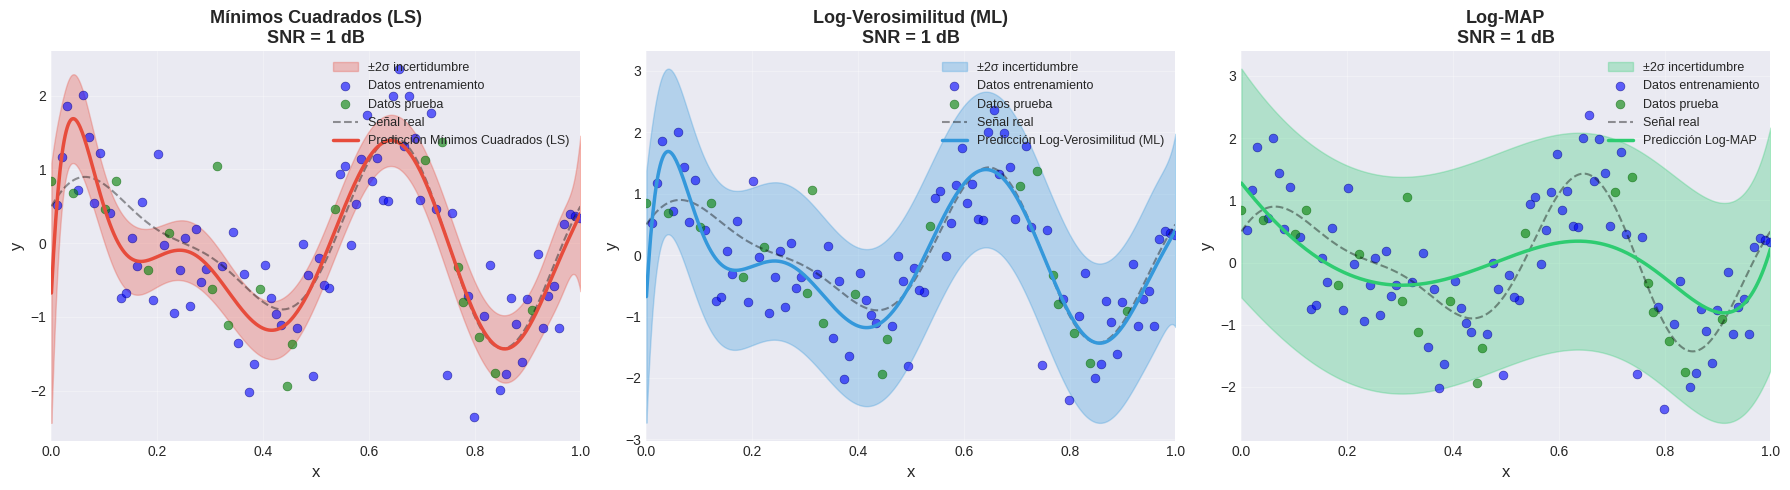


SNR = 2 dB

Métricas de evaluación en conjunto de prueba:
----------------------------------------------------------------------
Método     MSE          RMSE         MAE          R²        
----------------------------------------------------------------------
LS         0.313535     0.559942     0.454263     0.430544  
ML         0.313534     0.559941     0.454273     0.430544  
MAP        0.541668     0.735981     0.582382     0.016196  


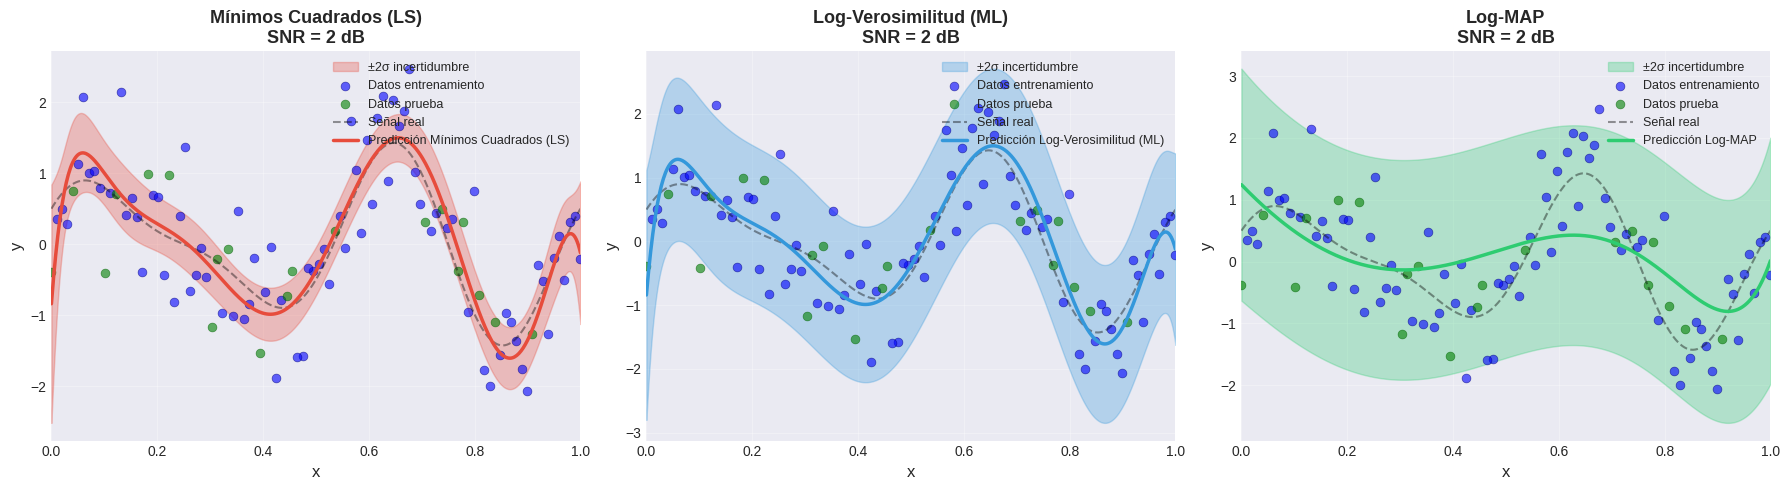


SNR = 5 dB

Métricas de evaluación en conjunto de prueba:
----------------------------------------------------------------------
Método     MSE          RMSE         MAE          R²        
----------------------------------------------------------------------
LS         0.203238     0.450819     0.355033     0.741343  
ML         0.203242     0.450824     0.355023     0.741338  
MAP        0.550851     0.742193     0.613483     0.298943  


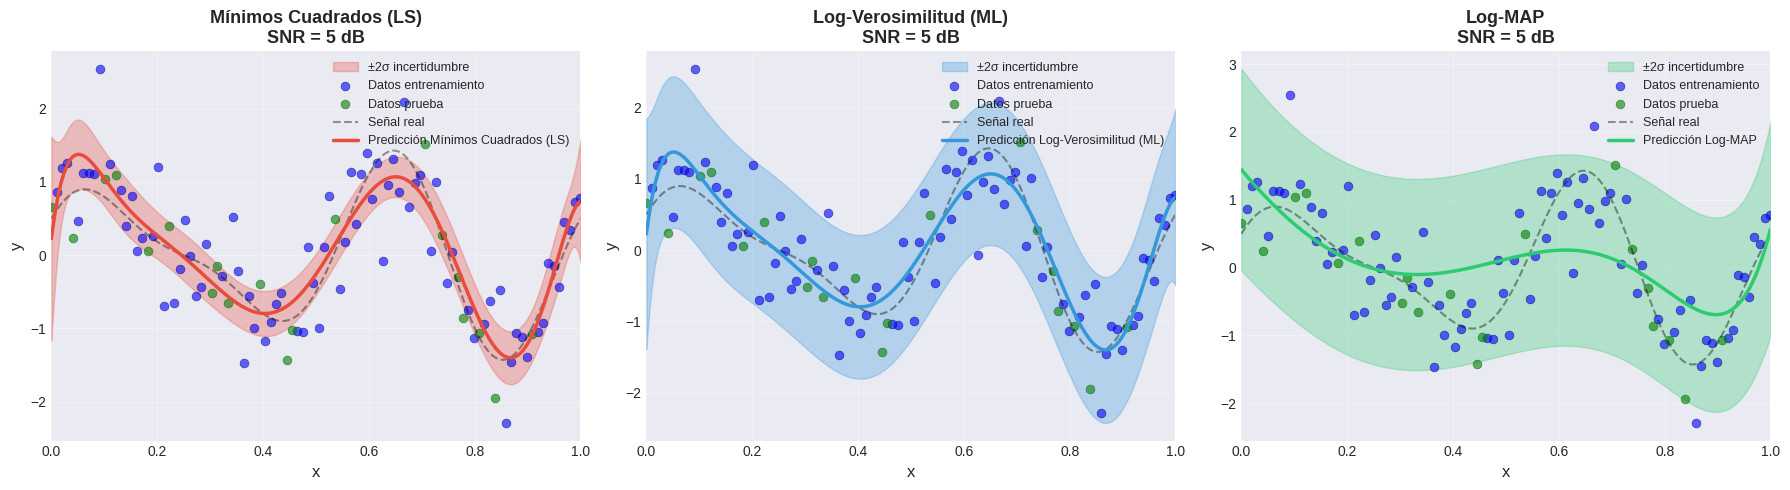


SNR = 10 dB

Métricas de evaluación en conjunto de prueba:
----------------------------------------------------------------------
Método     MSE          RMSE         MAE          R²        
----------------------------------------------------------------------
LS         0.053376     0.231032     0.167366     0.905151  
ML         0.053391     0.231066     0.167487     0.905124  
MAP        0.386404     0.621614     0.519931     0.313362  


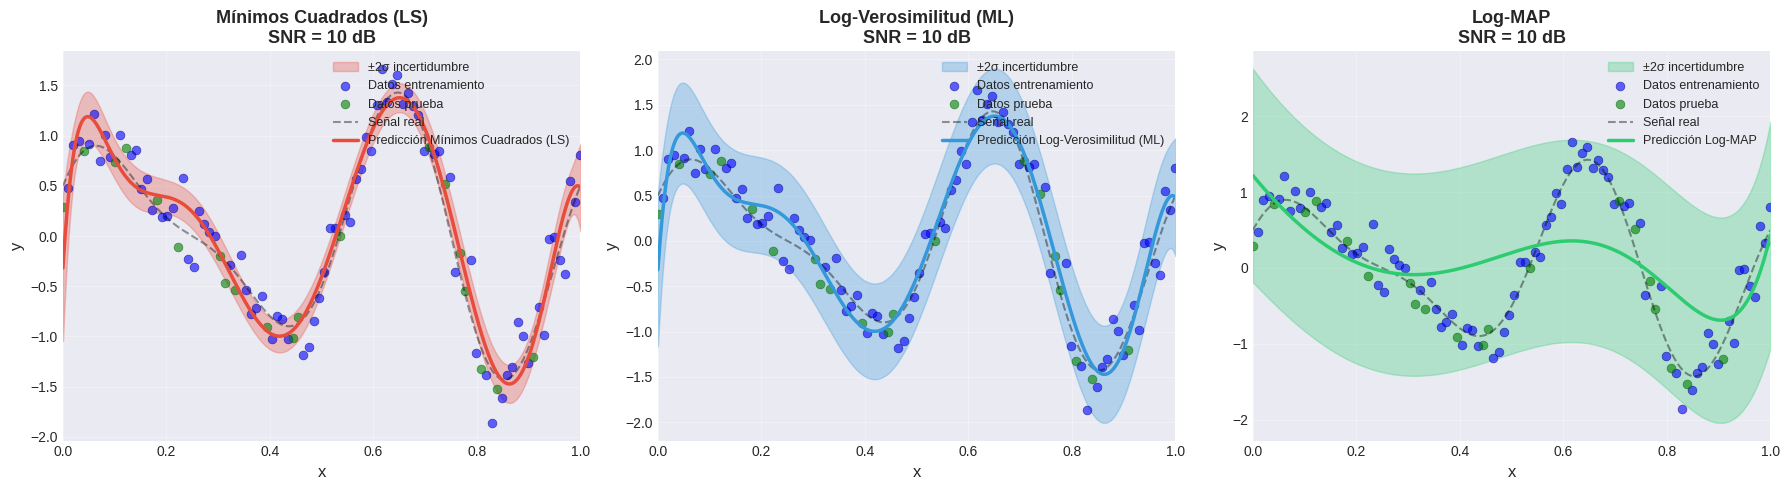


EXPERIMENTO COMPLETADO


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Configuración de estilo para gráficas
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

class PolynomialRegressor:
    """Clase base para regresores polinomiales"""
    def __init__(self, degree=9):
        self.degree = degree
        self.coeffs = None
        self.train_data = None

    def _design_matrix(self, x):
        """Construye matriz de diseño Φ(x) = [1, x, x², ..., x^degree]"""
        return np.vander(x, self.degree + 1, increasing=True)

    def predict(self, x):
        """Predicción puntual"""
        if self.coeffs is None:
            raise ValueError("Modelo no entrenado")
        Phi = self._design_matrix(x)
        return Phi @ self.coeffs

    def uncertainty(self, x):
        """Retorna incertidumbre (desviación estándar) - implementar en subclases"""
        raise NotImplementedError


class LeastSquaresRegressor(PolynomialRegressor):
    """Regresor por Mínimos Cuadrados (LS)"""
    def __init__(self, degree=9):
        super().__init__(degree)
        self.sigma2_noise = None

    def fit(self, x_train, y_train):
        """Ajuste por mínimos cuadrados: w = (Φ^T Φ)^(-1) Φ^T y"""
        self.train_data = (x_train, y_train)
        Phi = self._design_matrix(x_train)

        # Solución de mínimos cuadrados
        self.coeffs = np.linalg.lstsq(Phi, y_train, rcond=None)[0]

        # Estimación de varianza del ruido
        y_pred = self.predict(x_train)
        residuals = y_train - y_pred
        self.sigma2_noise = np.var(residuals, ddof=self.degree + 1)

        # Matriz de covarianza de parámetros: σ²(Φ^T Φ)^(-1)
        self.param_cov = self.sigma2_noise * np.linalg.inv(Phi.T @ Phi)

    def uncertainty(self, x):
        """Incertidumbre: σ²(x) = σ² φ(x)^T (Φ^T Φ)^(-1) φ(x)"""
        Phi_test = self._design_matrix(x)
        variances = np.sum(Phi_test @ self.param_cov * Phi_test, axis=1)
        return np.sqrt(variances)


class LogLikelihoodRegressor(PolynomialRegressor):
    """Regresor por Máxima Log-Verosimilitud (ML)"""
    def __init__(self, degree=9):
        super().__init__(degree)
        self.sigma_noise = None

    def fit(self, x_train, y_train):
        """Maximiza log-verosimilitud: L(w,σ) = -N/2 log(2πσ²) - 1/(2σ²)||y - Φw||²"""
        self.train_data = (x_train, y_train)
        N = len(y_train)
        Phi = self._design_matrix(x_train)

        def neg_log_likelihood(params):
            """Negativo de log-verosimilitud para minimizar"""
            w = params[:-1]
            log_sigma = params[-1]
            sigma = np.exp(log_sigma)

            y_pred = Phi @ w
            residuals = y_train - y_pred

            nll = N/2 * np.log(2 * np.pi * sigma**2) + np.sum(residuals**2) / (2 * sigma**2)
            return nll

        # Inicialización con solución LS
        ls_reg = LeastSquaresRegressor(self.degree)
        ls_reg.fit(x_train, y_train)

        initial_params = np.append(ls_reg.coeffs, np.log(np.sqrt(ls_reg.sigma2_noise)))

        # Optimización
        result = minimize(neg_log_likelihood, initial_params, method='BFGS')

        self.coeffs = result.x[:-1]
        self.sigma_noise = np.exp(result.x[-1])

        # Matriz de información de Fisher (Hessiana en el óptimo)
        # Aproximación: usar covarianza de parámetros del LS
        Phi_train = self._design_matrix(x_train)
        self.param_cov = self.sigma_noise**2 * np.linalg.inv(Phi_train.T @ Phi_train)

    def uncertainty(self, x):
        """Incertidumbre predictiva"""
        Phi_test = self._design_matrix(x)
        variances = np.sum(Phi_test @ self.param_cov * Phi_test, axis=1)
        # Incluye ruido de observación
        variances += self.sigma_noise**2
        return np.sqrt(variances)


class MAPRegressor(PolynomialRegressor):
    """Regresor por Máximo a Posteriori (MAP) con prior Gaussiano"""
    def __init__(self, degree=9, alpha=0.01):
        super().__init__(degree)
        self.alpha = alpha  # Parámetro de regularización (precisión del prior)
        self.sigma_noise = None

    def fit(self, x_train, y_train):
        """MAP con prior p(w) ~ N(0, α^(-1)I)"""
        self.train_data = (x_train, y_train)
        Phi = self._design_matrix(x_train)

        # Solución MAP: w = (Φ^T Φ + αI)^(-1) Φ^T y
        # Equivalente a Ridge Regression
        A = Phi.T @ Phi + self.alpha * np.eye(self.degree + 1)
        self.coeffs = np.linalg.solve(A, Phi.T @ y_train)

        # Estimación de σ²
        y_pred = self.predict(x_train)
        residuals = y_train - y_pred
        self.sigma_noise = np.std(residuals)

        # Covarianza posterior: Σ = (Φ^T Φ + αI)^(-1) σ²
        self.param_cov = self.sigma_noise**2 * np.linalg.inv(A)

    def uncertainty(self, x):
        """Incertidumbre posterior"""
        Phi_test = self._design_matrix(x)
        variances = np.sum(Phi_test @ self.param_cov * Phi_test, axis=1)
        # Incluye ruido de observación
        variances += self.sigma_noise**2
        return np.sqrt(variances)


def generate_synthetic_data(n_samples=100, snr_db=5, signal_type='mixed'):
    """
    Genera datos sintéticos: tono contaminado con ruido blanco gaussiano

    Parameters:
    -----------
    n_samples: número de muestras
    snr_db: relación señal-ruido en dB
    signal_type: 'sin', 'cos', o 'mixed' (combinación)
    """
    x = np.linspace(0, 1, n_samples)

    # Señal base (tono)
    if signal_type == 'sin':
        signal = np.sin(2 * np.pi * x)
    elif signal_type == 'cos':
        signal = np.cos(2 * np.pi * x)
    else:  # mixed - similar a la figura
        signal = np.sin(4 * np.pi * x) + 0.5 * np.cos(6 * np.pi * x)

    # Calcular potencia de la señal
    signal_power = np.mean(signal**2)

    # Calcular potencia del ruido para obtener SNR deseada
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear
    noise_std = np.sqrt(noise_power)

    # Generar ruido blanco gaussiano
    noise = np.random.normal(0, noise_std, n_samples)

    # Datos observados
    y = signal + noise

    return x, y, signal, noise_std


def plot_results(x_train, y_train, x_test, y_test, signal_test, models, snr_db):
    """Visualiza resultados de los tres regresores"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Puntos de evaluación suaves
    x_eval = np.linspace(0, 1, 500)

    model_names = ['Mínimos Cuadrados (LS)', 'Log-Verosimilitud (ML)', 'Log-MAP']
    colors = ['#e74c3c', '#3498db', '#2ecc71']

    for idx, (model, name, color) in enumerate(zip(models, model_names, colors)):
        ax = axes[idx]

        # Predicción y incertidumbre
        y_pred = model.predict(x_eval)
        uncertainty = model.uncertainty(x_eval)

        # Banda de confianza (±2σ ≈ 95%)
        ax.fill_between(x_eval, y_pred - 2*uncertainty, y_pred + 2*uncertainty,
                        alpha=0.3, color=color, label='±2σ incertidumbre')

        # Datos de entrenamiento y prueba
        ax.scatter(x_train, y_train, color='blue', s=40, alpha=0.6,
                  label='Datos entrenamiento', edgecolors='navy', linewidth=0.5)
        ax.scatter(x_test, y_test, color='green', s=40, alpha=0.6,
                  label='Datos prueba', edgecolors='darkgreen', linewidth=0.5)

        # Señal real (sin ruido)
        ax.plot(x_eval, np.sin(4 * np.pi * x_eval) + 0.5 * np.cos(6 * np.pi * x_eval),
               'k--', linewidth=1.5, alpha=0.4, label='Señal real')

        # Predicción
        ax.plot(x_eval, y_pred, color=color, linewidth=2.5, label=f'Predicción {name}')

        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.set_title(f'{name}\nSNR = {snr_db} dB', fontsize=13, fontweight='bold')
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 1)

    plt.tight_layout()
    return fig


def evaluate_models(models, x_test, y_test):
    """Evalúa el desempeño de los modelos"""
    results = {}

    for name, model in models.items():
        y_pred = model.predict(x_test)

        # Métricas
        mse = np.mean((y_test - y_pred)**2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(y_test - y_pred))

        # R² score
        ss_res = np.sum((y_test - y_pred)**2)
        ss_tot = np.sum((y_test - np.mean(y_test))**2)
        r2 = 1 - (ss_res / ss_tot)

        results[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        }

    return results


def main():
    """Función principal que ejecuta el experimento completo"""

    print("="*70)
    print("REGRESIÓN POLINOMIAL CON DIFERENTES MÉTODOS")
    print("="*70)

    # Parámetros
    n_samples = 100
    snr_values = [1, 2, 5, 10]  # SNR en dB
    degree = 9  # Grado del polinomial

    # Experimentar con diferentes SNR
    for snr_db in snr_values:
        print(f"\n{'='*70}")
        print(f"SNR = {snr_db} dB")
        print(f"{'='*70}")

        # Generar datos
        x, y, signal, noise_std = generate_synthetic_data(n_samples, snr_db, 'mixed')

        # Dividir en entrenamiento (80%) y prueba (20%)
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.2, random_state=42
        )

        # Ordenar datos de prueba para visualización
        sort_idx = np.argsort(x_test)
        x_test = x_test[sort_idx]
        y_test = y_test[sort_idx]

        # Señal real en puntos de prueba
        signal_test = np.sin(4 * np.pi * x_test) + 0.5 * np.cos(6 * np.pi * x_test)

        # Crear y entrenar modelos
        ls_model = LeastSquaresRegressor(degree=degree)
        ml_model = LogLikelihoodRegressor(degree=degree)
        map_model = MAPRegressor(degree=degree, alpha=0.01)

        ls_model.fit(x_train, y_train)
        ml_model.fit(x_train, y_train)
        map_model.fit(x_train, y_train)

        models_dict = {
            'LS': ls_model,
            'ML': ml_model,
            'MAP': map_model
        }

        # Evaluar modelos
        results = evaluate_models(models_dict, x_test, y_test)

        print("\nMétricas de evaluación en conjunto de prueba:")
        print("-" * 70)
        print(f"{'Método':<10} {'MSE':<12} {'RMSE':<12} {'MAE':<12} {'R²':<10}")
        print("-" * 70)
        for method, metrics in results.items():
            print(f"{method:<10} {metrics['MSE']:<12.6f} {metrics['RMSE']:<12.6f} "
                  f"{metrics['MAE']:<12.6f} {metrics['R²']:<10.6f}")

        # Visualizar (sin guardar, solo mostrar)
        fig = plot_results(x_train, y_train, x_test, y_test, signal_test,
                          [ls_model, ml_model, map_model], snr_db)
        plt.show()  # Mostrar en Jupyter/Colab

    print("\n" + "="*70)
    print("EXPERIMENTO COMPLETADO")
    print("="*70)


if __name__ == "__main__":
    main()